In [15]:
from tensorflow import keras
from tensorflow.keras.datasets import reuters
import numpy as np

In [6]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [7]:
len(train_data)

8982

In [8]:
len(test_data)

2246

In [9]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [10]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
[reverse_word_index.get(i-3, "?") for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [11]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [12]:
train_labels[10]

3

In [16]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [81]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])


In [82]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [83]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [84]:
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=9,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 30ms/step - loss: 2.6012 - accuracy: 0.5679 - val_loss: 1.8275 - val_accuracy: 0.6650
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.4686 - accuracy: 0.7234 - val_loss: 1.3458 - val_accuracy: 0.7250
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.0665 - accuracy: 0.7893 - val_loss: 1.1356 - val_accuracy: 0.7710
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.8337 - accuracy: 0.8314 - val_loss: 1.0198 - val_accuracy: 0.8010
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.6705 - accuracy: 0.8664 - val_loss: 0.9457 - val_accuracy: 0.8140
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.5469 - accuracy: 0.8930 - val_loss: 0.8942 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.4518 - accuracy: 0.9084 - val_loss: 0.8640 - val_accuracy: 0.8190
Epoch 8/9
16/16 [===

range(1, 10)


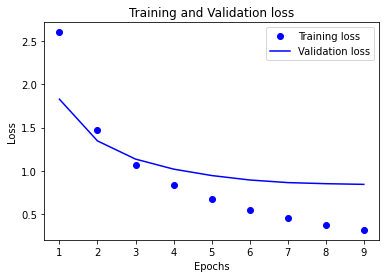

In [85]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values = history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
print(epochs)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


range(1, 10)


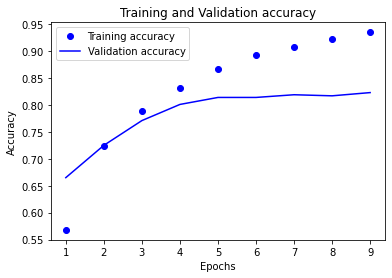

In [86]:
import matplotlib.pyplot as plt
history_dict=history.history
acc_values = history_dict["accuracy"]
val_acc_values=history_dict["val_accuracy"]
epochs = range(1, len(acc_values) + 1)
print(epochs)
plt.plot(epochs, acc_values, "bo", label="Training accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [87]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9180 - accuracy: 0.7956


In [88]:
results

[0.9179942011833191, 0.7956367135047913]